# Annotation

In [1]:
import pandas
import sklearn
from sklearn.metrics import cohen_kappa_score

import matplotlib.pyplot as plt
import seaborn
import numpy

## Reading of the csv file

In [2]:
path_csv = "ENGLISH_5_Annotators_2019schema_cleanedforIAA.xlsx"

df = pandas.read_excel(path_csv)
df.dropna(how='all')



Name QUESTION FORM QUESTION FUNCTION FEATURE ANSWER FORM  \
0     Marta            YN                CS       0        NONE   
1    Yiting            YN                CS       0        NONE   
2       Lea            YN                CS       0        NONE   
3     Alena            YN                CS       0          YN   
4      Axel            YN                CS     0\n          YN   
..      ...           ...               ...     ...         ...   
553  Yiting            YN               PHA       0        NONE   
554     Lea            YN               PHA       0        NONE   
555   Alena          YN\n               PHA       0        NONE   
556    Axel          YN\n               PHA       0        NONE   
557    GOLD            YN               PHA       0        NONE   

    ANSWER FUNCTION FEATURE.1 DIRECT_ANSWER INDIRECT_ANSWER  \
0         GIVE_CONF         0            NO             YES   
1         GIVE_CONF         0            NO             YES   
2         GIVE_CONF        RE            NO             YES   
3         GIVE_CONF         0           YES               0   
4         GIVE_CONF         0           YES               0   
..              ...       ...           ...             ...   
553            NONE         0             0               0   
554            NONE         0             0               0   
555            NONE         0             0               0   
556            NONE         0             0               0   
557            NONE         0             0               0   

    HAS_DIALOGIC_FUNCTION HAS_IMPLICATION NOT_ANSWER Unnamed: 12  
0                     YES               0          0         NaN  
1                     YES               0          0         NaN  
2                     YES               0          0         NaN  
3                       0               0          0         NaN  
4                       0               0          0         NaN  
..                    ...             ...        ...         ...  
553                     0               0          0         NaN  
554                     0               0          0         NaN  
555                     0               0        YES         NaN  
556                     0               0        YES         NaN  
557                     0               0          0         NaN  

[558 rows x 13 columns]

## Total column 

## Selection by name 

In [3]:
# Total column
df['TOTAL'] = df.iloc[:,2:].astype(str).sum(1)  


marta_df = df.loc[df['Name'] == "Marta"]
yiting_df = df.loc[df['Name'] == "Yiting"]
lea_df = df.loc[df['Name'] == "Lea"]
alena_df = df.loc[df['Name'] == "Alena"]
axel_df = df.loc[df['Name'] == "Axel"]
gold_df = df.loc[df['Name'] == "GOLD"]



## k score between three annotators

In [9]:
kscore_features={
    'QUESTION FORM' :["YN","WH","DQ_E","AUX_E", "AUX_D"],
    #'EXPECTED ANSWER FORM':["G1","G2","G4","G5","G6"],
    'QUESTION FUNCTION':["CS", "PHA", "ASK_CONF", "ASK_FEAT", "RS"],
    'FEATURE': ["CH", "LOC", "TH", "TMP","0"],
    #'EXPECTED ANSWER FUNCTION': ["G7","G8","G9","G10","G11"],
    'ANSWER FORM': ["YN", "UNC", "UNK", "WH", "NONE"],
    'ANSWER FUNCTION': ["REFUSE", "PHA", "GIVE_CONF", "GIVE_FEAT","GIVE_UNC", "NONE"],
    'FEATURE': ["RE", "TH", "TMP","0"],
    #'MISMATCH_FORM': ["YES", "NO", "0"],
    #'MISMATCH_FUNCTION': ["YES", "NO", "0"],
    'DIRECT_ANSWER': ["YES", "NO","0"],
    'INDIRECT_ANSWER': ["YES", "NO","0"],
    'HAS_DIALOGIC_FUNCTION': ["YES", "NO","0"],
    'HAS_IMPLICATION': ["YES", "NO","0"],
    'NOT_ANSWER': ["YES", "NO", "0"],
    'TOTAL': None
   
}

kscore_dict = dict()

for key,val in kscore_features.items():
        kscore_dict[key] = {
            "MARTA_YITING" : cohen_kappa_score(marta_df[key].astype(str),yiting_df[key].astype(str),labels =val),
            "MARTA_LEA" : cohen_kappa_score(marta_df[key].astype(str),lea_df[key].astype(str),labels =val),
            "YITING_LEA" : cohen_kappa_score(yiting_df[key].astype(str),lea_df[key].astype(str),labels =val) ,
            "Alena_MARTA" : cohen_kappa_score(marta_df[key].astype(str),alena_df[key].astype(str),labels =val),
            "Alena_LEA" : cohen_kappa_score(alena_df[key].astype(str),lea_df[key].astype(str),labels =val),
            "Alena_YITING" : cohen_kappa_score(yiting_df[key].astype(str),alena_df[key].astype(str),labels =val) ,
            "Axel_MARTA" : cohen_kappa_score(marta_df[key].astype(str),axel_df[key].astype(str),labels =val),
            "Axel_LEA" : cohen_kappa_score(axel_df[key].astype(str),lea_df[key].astype(str),labels =val),
            "Axel_YITING" : cohen_kappa_score(yiting_df[key].astype(str),axel_df[key].astype(str),labels =val) ,
            "Alena_Axel" : cohen_kappa_score(alena_df[key].astype(str),axel_df[key].astype(str),labels =val) ,            
        }

        

kscore_df = pandas.DataFrame(kscore_dict) 
kscore_df



QUESTION FORM  QUESTION FUNCTION   FEATURE  ANSWER FORM  \
MARTA_YITING       0.944228           0.878292  1.000000     0.853646   
MARTA_LEA          0.944010           0.908239  0.947796     0.901950   
YITING_LEA         0.892361           0.877511  0.936324     0.837299   
Alena_MARTA        0.882774           0.703427  0.790536     0.702773   
Alena_LEA          0.830721           0.700531  0.748637     0.666599   
Alena_YITING       0.887640           0.640197  0.745083     0.680147   
Axel_MARTA         0.913517           0.709088  0.808462     0.551404   
Axel_LEA           0.916667           0.768925  0.878832     0.548449   
Axel_YITING        0.861666           0.769612  0.808462     0.574630   
Alena_Axel         0.856000           0.699656  0.834369     0.795670   

              ANSWER FUNCTION  DIRECT_ANSWER  INDIRECT_ANSWER  \
MARTA_YITING         0.855479       0.822044         0.767112   
MARTA_LEA            0.882503       0.842610         0.826954   
YITING_LEA           0.788916       0.837413         0.793620   
Alena_MARTA          0.514979       0.423197         0.208676   
Alena_LEA            0.486297       0.373883         0.210448   
Alena_YITING         0.550265       0.362111         0.280066   
Axel_MARTA           0.393562       0.342346         0.097671   
Axel_LEA             0.408219       0.368287         0.136327   
Axel_YITING          0.401248       0.373315         0.116194   
Alena_Axel           0.626472       0.722222         0.478510   

              HAS_DIALOGIC_FUNCTION  HAS_IMPLICATION  NOT_ANSWER     TOTAL  
MARTA_YITING               0.745066         0.687264    0.679089  0.663506  
MARTA_LEA                  0.875402         0.800215    0.851200  0.744378  
YITING_LEA                 0.740803         0.659479    0.635294  0.686908  
Alena_MARTA                0.163940         0.095379    0.310997  0.229929  
Alena_LEA                  0.172414         0.086093    0.219136  0.217924  
Alena_YITING               0.231504         0.211750    0.308576  0.249368  
Axel_MARTA                 0.133540         0.102731    0.249327  0.180416  
Axel_LEA                   0.139928         0.096933    0.228047  0.203280  
Axel_YITING                0.075227         0.137990    0.375194  0.223477  
Alena_Axel                 0.170237         0.114047    0.672831  0.403626

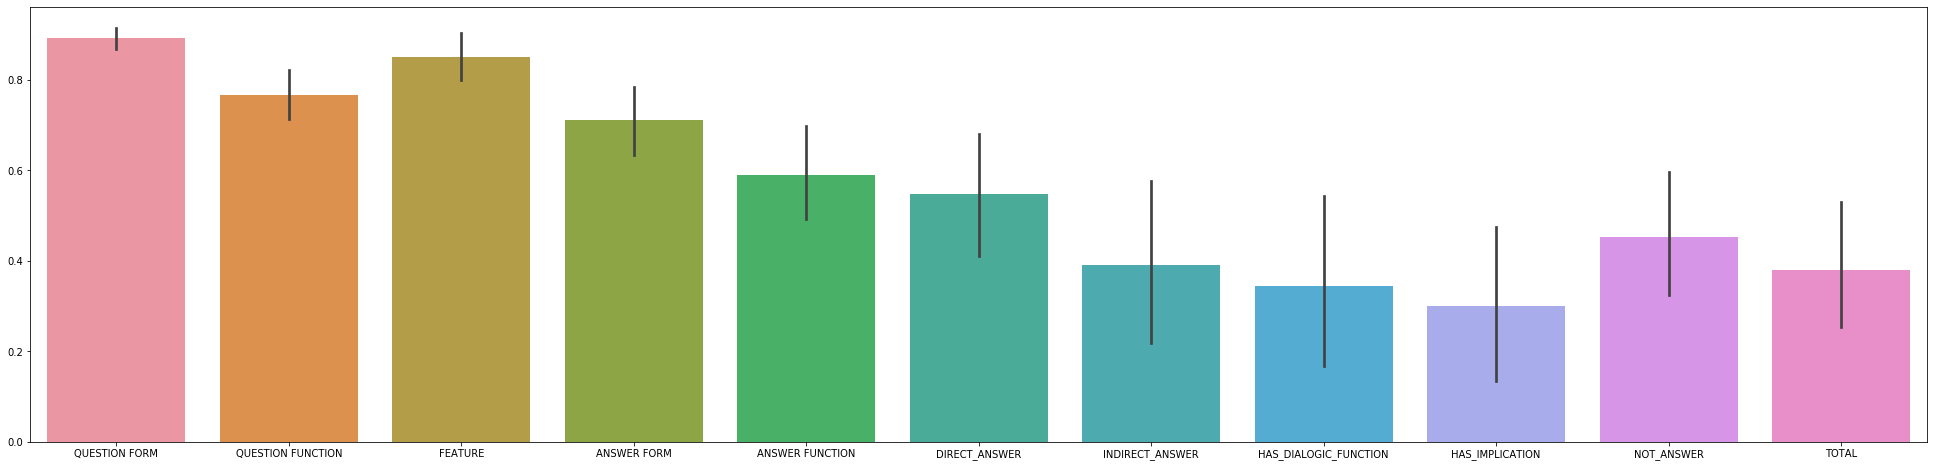

In [5]:
plt.figure(figsize=(34,8))
seaborn.barplot(data=kscore_df)


## K score between each annotator and the GOLD standard

In [7]:
kscore_dict = dict()

for key,val in kscore_features.items():
        kscore_dict[key] = {
            "GOLD_YITING" : cohen_kappa_score(gold_df[key].astype(str),yiting_df[key].astype(str),labels =val),
            "GOLD_LEA" : cohen_kappa_score(gold_df[key].astype(str),lea_df[key].astype(str),labels =val),
            "GOLD_MARTA" : cohen_kappa_score(gold_df[key].astype(str),marta_df[key].astype(str),labels =val) ,
            "GOLD_ALENA" : cohen_kappa_score(gold_df[key].astype(str),alena_df[key].astype(str),labels =val),
            "GOLD_AXEL" : cohen_kappa_score(gold_df[key].astype(str),axel_df[key].astype(str),labels =val) ,
        }

        

kscore_df = pandas.DataFrame(kscore_dict) 
kscore_df


QUESTION FORM  QUESTION FUNCTION   FEATURE  ANSWER FORM  \
GOLD_YITING       0.944245           0.893156  1.000000     0.883775   
GOLD_LEA          0.888019           0.923217  0.947796     0.949727   
GOLD_MARTA        0.941820           0.954240  1.000000     0.966368   
GOLD_ALENA        0.882736           0.717551  0.790536     0.694908   
GOLD_AXEL         0.856000           0.724308  0.808462     0.540079   

             ANSWER FUNCTION  DIRECT_ANSWER  INDIRECT_ANSWER  \
GOLD_YITING         0.807598       0.823059         0.744996   
GOLD_LEA            0.865777       0.843288         0.804776   
GOLD_MARTA          0.966679       0.913825         0.975513   
GOLD_ALENA          0.473408       0.335534         0.198257   
GOLD_AXEL           0.365239       0.332445         0.091986   

             HAS_DIALOGIC_FUNCTION  HAS_IMPLICATION  NOT_ANSWER     TOTAL  
GOLD_YITING               0.723887         0.658367    0.679089  0.687492  
GOLD_LEA                  0.852498         0.772218    0.851200  0.768224  
GOLD_MARTA                0.975781         0.966667    1.000000  0.872157  
GOLD_ALENA                0.155069         0.087388    0.310997  0.230483  
GOLD_AXEL                 0.127252         0.095823    0.249327  0.182916

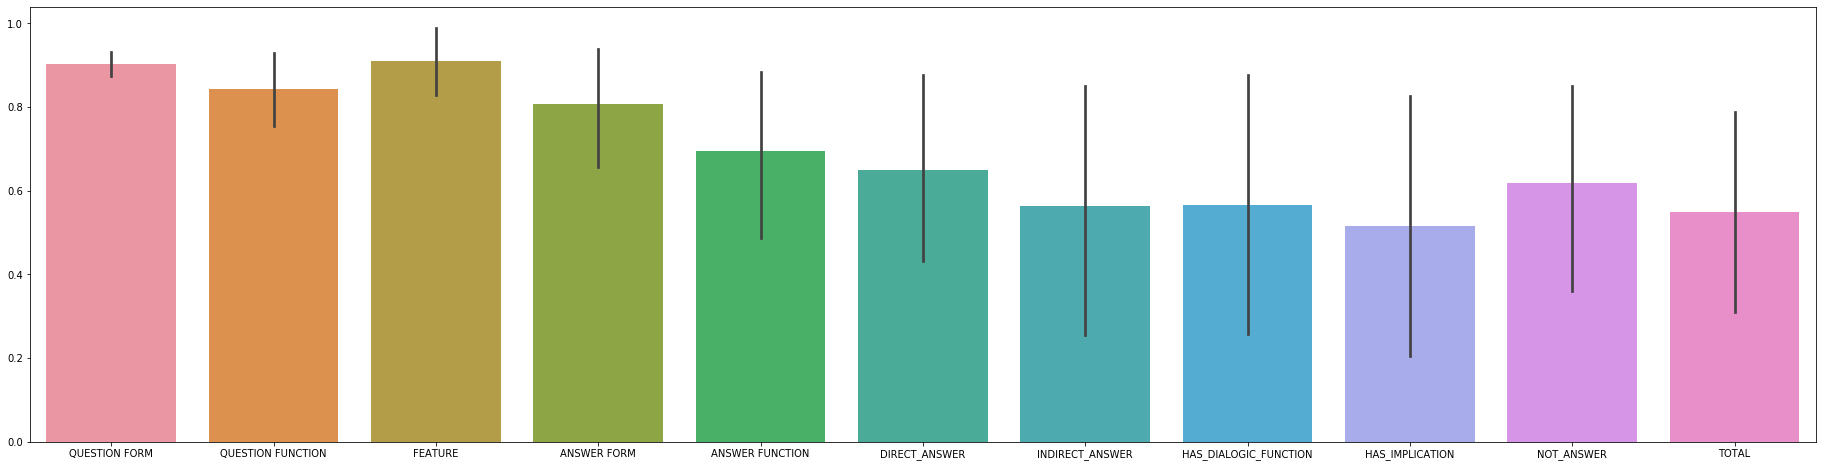

In [8]:
plt.figure(figsize=(32,8))
seaborn.barplot(data=kscore_df)